<a href="https://colab.research.google.com/github/sanyamChaudhary27/ML_models_from_scratch/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns

In [62]:
class LogisticRegression:
    def __init__(self, n_iterations=100, learning_rate = 0.1):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.weights = None
        self.intercept = 0
    def fit(self, X, y):
        self.X = X
        self.y = y
        n_samples, n_features = self.X.shape
        self.weights = np.zeros(n_features)
        for _ in range(self.n_iterations):
            preds = self.predict(self.X)
            dw = (1/n_samples) * np.dot(self.X.T, (preds - self.y))
            db = (1/n_samples) * np.sum(preds - self.y)
            self.weights -= self.learning_rate * dw
            self.intercept -= self.learning_rate * db

    def predict(self, X):
        if self.intercept is None or self.weights is None:
            raise ValueError("Model is not fit() yet. Please call model.fit() first")
        linear_model = np.dot(X, self.weights) + self.intercept
        return 1 / (1 + np.exp(-linear_model))

In [63]:
df = sns.load_dataset('iris')

In [64]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [65]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
df = df[df['species'] != 'setosa']

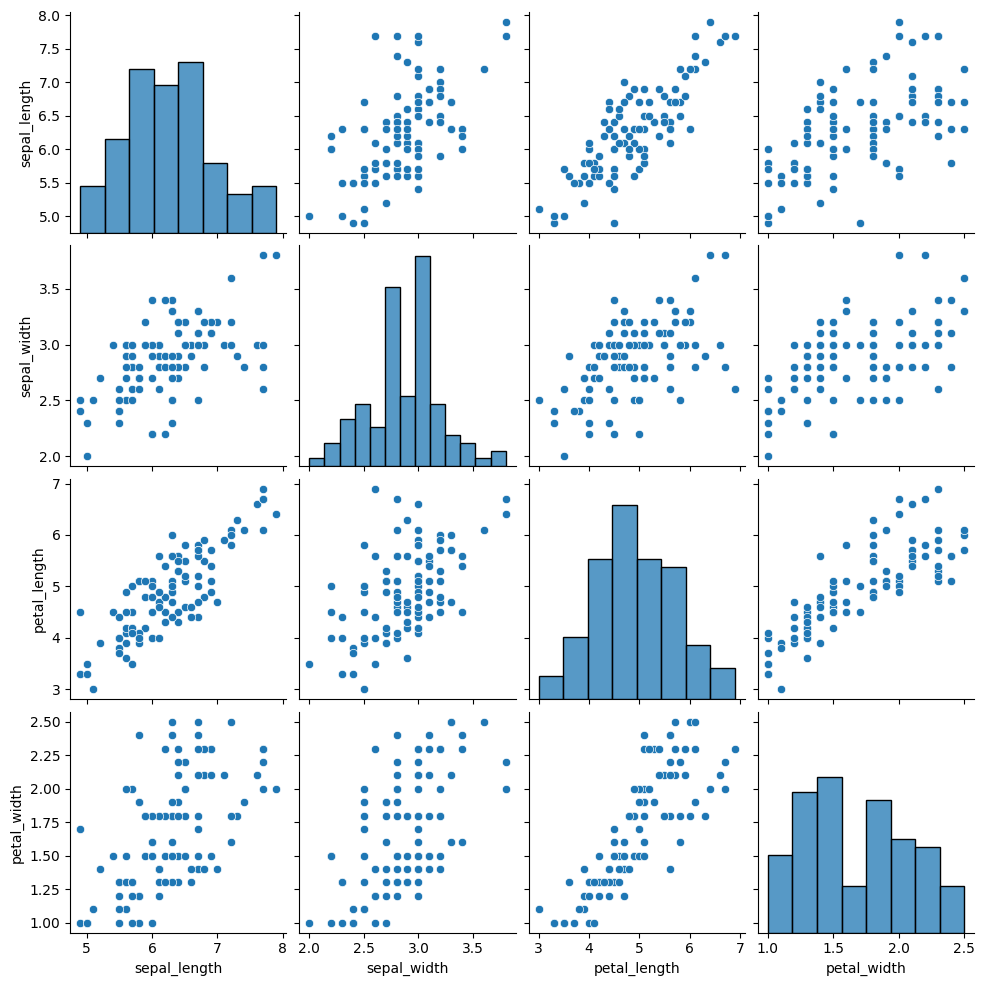

In [67]:
sns.pairplot(df)

In [76]:
df['species'] = df['species'].map({'versicolor': 0, 'virginica': 1})

In [69]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state =42)

In [71]:
model = LogisticRegression(n_iterations=1000, learning_rate=0.05)

In [72]:
model.fit(X_train, y_train)

In [78]:
preds = model.predict(X_val)
binary_preds = np.where(preds >= 0.5, 1, 0)

In [74]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(binary_preds, y_val))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.80      0.89        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



## Notebook Conclusions: Custom Logistic Regression for Iris Species Classification

This notebook demonstrates a binary classification task using a custom-implemented Logistic Regression model to distinguish between 'versicolor' and 'virginica' species from the Iris dataset.

### 1. Data Preparation and Preprocessing
*   The **Iris dataset** was loaded using `seaborn`.
*   The 'setosa' species was **filtered out**, focusing only on 'versicolor' and 'virginica' for binary classification.
*   The target variable ('species') was **encoded numerically**: 'versicolor' mapped to `0` and 'virginica' mapped to `1`.
*   The dataset was split into **features (X)** and **target (y)**.
*   A **training set** (`X_train`, `y_train`) and a **validation set** (`X_val`, `y_val`) were created using an 80/20 split, respectively.

### 2. Custom Logistic Regression Model
*   A `LogisticRegression` class was implemented from scratch, including `fit` and `predict` methods. This model uses gradient descent to learn weights and an intercept.
*   The model was initialized with `n_iterations=1000` and `learning_rate=0.05`.

### 3. Model Training and Evaluation
*   The custom Logistic Regression model was **trained** on the training data.
*   Predictions were made on the unseen **validation set**.
*   The model's performance was evaluated using `sklearn.metrics.classification_report`.

### 4. Results
The classification report for the validation set provided the following metrics:

```
                  precision    recall  f1-score   support

         0 (versicolor)       0.83      1.00      0.91        10
         1 (virginica)        1.00      0.80      0.89        10

             accuracy                           0.90        20
            macro avg       0.92      0.90      0.90        20
         weighted avg       0.92      0.90      0.90        20
```

*   **Overall Accuracy:** The model achieved an accuracy of **90%** on the validation set, correctly classifying 18 out of 20 samples.
*   **Class 0 (versicolor):**
    *   **Precision:** 0.83 (Out of all samples predicted as versicolor, 83% were actually versicolor).
    *   **Recall:** 1.00 (The model correctly identified all actual versicolor samples).
    *   **F1-score:** 0.91 (A good balance between precision and recall for this class).
*   **Class 1 (virginica):**
    *   **Precision:** 1.00 (Out of all samples predicted as virginica, 100% were actually virginica).
    *   **Recall:** 0.80 (The model correctly identified 80% of actual virginica samples).
    *   **F1-score:** 0.89 (A strong F1-score, showing good performance).

### Conclusion
The custom Logistic Regression model successfully performed binary classification on the selected Iris species, achieving high accuracy, precision, and recall on the validation set. This indicates that the implemented model is effective for this particular classification task.